# Brain Tumor Classification - Baseline CNN Model

This notebook analyses the results for the baseline CNN model for brain tumor classification using PyTorch.

In [1]:
# import modules
import torch
import pickle
import os

from src.models.cnn import BrainTumorCNN
from src.utils.visualization import plot_training_history, conf_matrix
from src.config.data import data_setup_remove_duplicated
from src.utils.prediction import predict_single_image, summary


In [2]:
# import data
train_set, test_set, label_conversion_dict = data_setup_remove_duplicated()
class_labels = list(label_conversion_dict.keys())[:4]

/Users/bengriffin/Library/CloudStorage/OneDrive-AarhusUniversitet/Dokumenter/PhD/git_repos/erdos/brainnet-medical-imaging/src/config/data.py:82: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unique['label'] = df_unique['filepath'].apply(lambda x: x.split('/')[-2])
/Users/bengriffin/Library/CloudStorage/OneDrive-AarhusUniversitet/Dokumenter/PhD/git_repos/erdos/brainnet-medical-imaging/src/config/data.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unique['class'] = df_unique['filename'].apply(lamb

Initial number of samples in train set: 5521
Initial number of samples in test set: 1205
Total samples in train set after overriding labels: 5521
Total samples in test set after overriding labels: 1205
Total files in train set: 5521, with target values: [0, 1, 2, 3]
Total files in test set: 1205, with target values: [0, 1, 2, 3]


In [3]:
# Path to the results folder
results_dir = '../results'
num_epochs = 2

# Paths to specific files
model_path = os.path.join(results_dir, f'baseline_model_{num_epochs}_epochs.pth')
history_path = os.path.join(results_dir, f'baseline_history_{num_epochs}_epochs.pkl')

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Re-initialize the model
model_cnn = BrainTumorCNN().to(device)

# Load the trained weights
model_cnn.load_state_dict(torch.load(model_path, map_location=device))
model_cnn.eval()  # Set to evaluation mode

# Load history dictionary
with open(history_path, 'rb') as f:
    history_cnn = pickle.load(f)


## 5. Visualizing Results

We visualize the training and validation metrics to understand how our model performs over time. This includes:
- Training and validation loss curves
- Validation accuracy progression

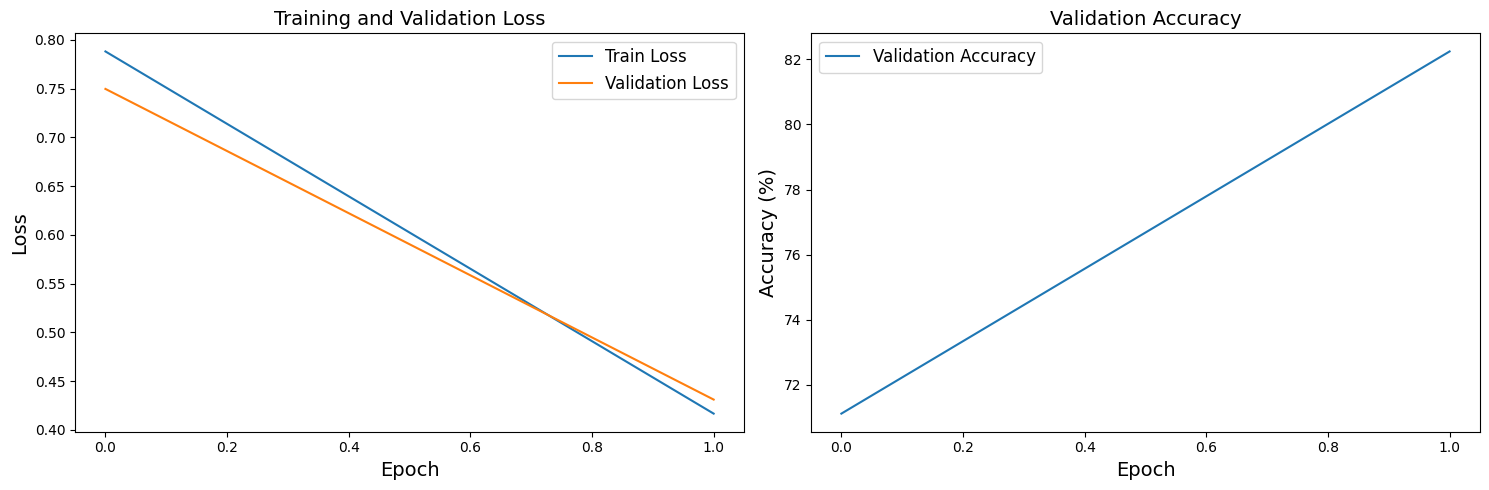

In [4]:
# Plot training history
plot_training_history(history_cnn)

We now test our model on an example image from the test set and visualize the results. This helps us understand how the model performs on specific examples.

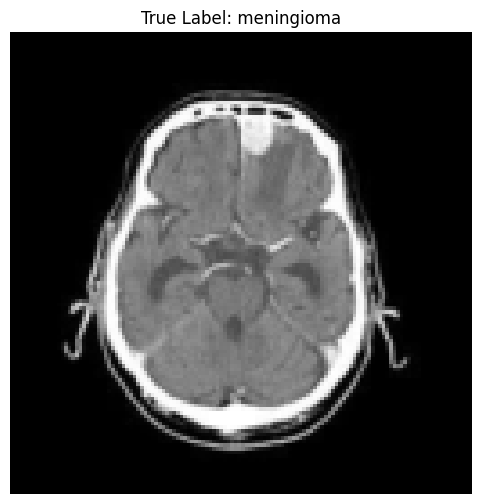

Predicted Class: notumor


In [5]:
# Example prediction
predicted_class = predict_single_image(model_cnn, test_set, device)

We can now plot the confusion matrix of our predictions to understand if our model performs well/poorly for certain classes.

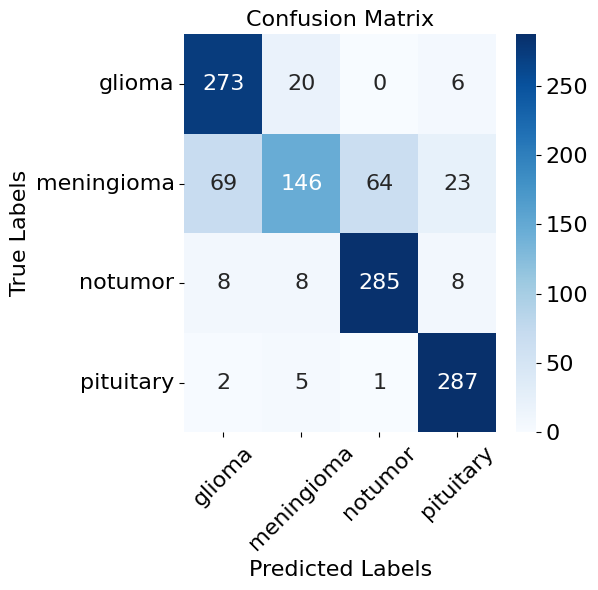

In [7]:
conf_matrix_result = conf_matrix(model_cnn, test_set, label_conversion_dict)

In [8]:
summary(conf_matrix_result, class_labels)

Summary: 

We have 

77.56% accuracy rate for predicting glioma.
If glioma is predicted, the true class of the predicted image could be:
meningioma with 19.60% chance
notumor with 2.27% chance
pituitary with 0.57% chance


81.56% accuracy rate for predicting meningioma.
If meningioma is predicted, the true class of the predicted image could be:
glioma with 11.17% chance
notumor with 4.47% chance
pituitary with 2.79% chance


81.43% accuracy rate for predicting notumor.
If notumor is predicted, the true class of the predicted image could be:
glioma with 0.00% chance
meningioma with 18.29% chance
pituitary with 0.29% chance


88.58% accuracy rate for predicting pituitary.
If pituitary is predicted, the true class of the predicted image could be:
glioma with 1.85% chance
meningioma with 7.10% chance
notumor with 2.47% chance


